# Beginner's Python—Session Two Biochemistry Answers

## **Colour and Conjugation**

In [79]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import linregress
from sklearn.metrics import r2_score

A human eye can detect wavelengths of light between 380 to 740 nanometers, this range of wavelengths is classed as visible light. Materials appear to us as the colours that they reflect, meaning the remainng <span style="color:#FF200F">c</span><span style="color:#FF820F">o</span><span style="color:#FFC80F">l</span><span style="color:#A2F80F">o</span><span style="color:#4682E2">u</span><span style="color:#3B2FCE">r</span><span style="color:#FF0095">s</span> are absorbed by the material. Below is a diagram depicting the wavelength's of light (in metres) and their corresponding colours.

<center><img src="./session_two_files/spectrum.png" width="450" align="center"/> 

<center><img src="./session_two_files/chlorophyll_structure.svg" width="200" align="center"/> 

Displayed above, is the molecule **chlorophyll** $\boldsymbol{a}$. It is an essential molecule for photosynthetic organisms, and drives photosynthesis by absorbing light, converting it into energy via electron transfer. Perhaps it is most well known for its characteristic <span style="color:#259B13">green</span> colour, which we see in plants, trees and grass.

**Run the code cell below.**

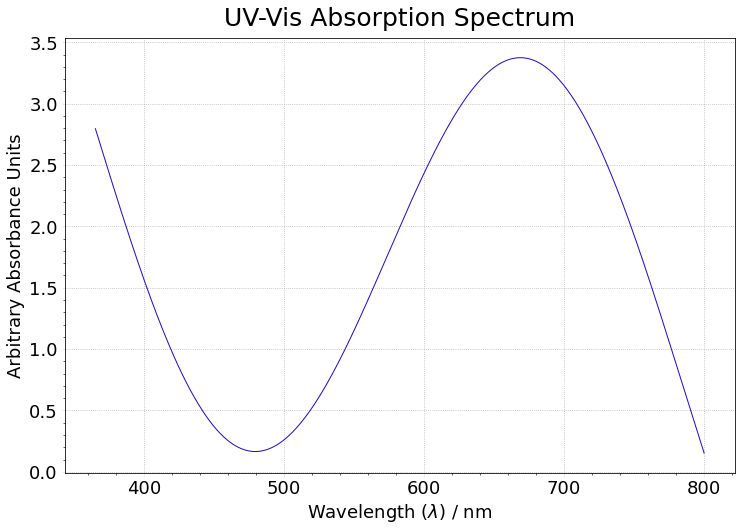

In [80]:
#Run this code
#Creating an array to input wavelength and absorbance values
wavelength = np.linspace(365,800,436)
absorbance = np.empty(436)
aa = len(absorbance)

#Defining a function to represent the spectrum
for i in range(aa):
    absorbance[i] = -np.cos((2*wavelength[i]-40)/280)+np.sin((2*wavelength[i]-40)/280)-(5/2)*np.cos((4*wavelength[i]-40)/280) - (1/2)*np.sin((4*wavelength[i]-40)/280) +1.8

#plotting graph
plt.figure(figsize=(12,8))
plt.xlabel('Wavelength ($\lambda$) / nm',fontsize=18) 
plt.ylabel('Arbitrary Absorbance Units',fontsize=18)
plt.title('UV-Vis Absorption Spectrum',pad=12, fontsize=25)
plt.grid(linestyle='dotted',c='0.7')
plt.plot(wavelength,absorbance,lw=1,c='#2909B9')
plt.tick_params(color='0.9',labelsize=18)
plt.minorticks_on()

 #### **Task 1**

The ${\lambda_{max}}$ value is often used to characterise the UV-Vis spectrum of compounds; It is the wavelength with the highest absorbance value. 

**Using the `max()` function determine the ${\lambda_{max}}$ of the `absorbance` dataset**

In [81]:
#printing max absorbance
print(max(absorbance))

3.374154018016365


**Using the value obtained, fill in the blanks:**

In [82]:
#Code to deduce the x-val using the maximum y-val
max_abs = max(absorbance)
max_wav = wavelength[absorbance.argmax()]  
print("The value is",max_wav, "nm")

The value is 669.0 nm


**Using the equation  $E = \frac{hc}{\lambda}$  determine the energy of the light wave absorbed ${\lambda_{max}}$ in joules $(J)$.**

$ E = energy \\
h = Planck\ constant\ (6.626×10−34\ Js)  \\
c = speed \ of \ light \ (3 \times 10^{8}m \ s^{-1} ) \\
\lambda = wavelength \ (m)
$

**NOTE:** Don't forget units,  $1nm = 1 \times 10^{-9}m$. Input like this:  `1e-9`.

In [83]:
h = 6.626e-34
c = 3e8
E = (h*c)/(max_wav)
print("The energy of the peak is", E, "J")

The energy of the peak is 2.9713004484304933e-28 J


**BONUS: Create a mini program using  `input()` to automatically calculate wavelength for any given energy value.**

**NOTE:** Be careful with what type of input you allow, remember you can specify the `type()` using `float()`, `str()`, or `int()`.

In [89]:
h = 6.626e-34
c = 3e8
e_input = float(input("What is the energy value?\n"))
wav_calc = (h*c)/(e_input)
print("The wavelength is ",wav_calc,"nm" )

What is the energy value?
 5e-28


The wavelength is  397.56 nm


## **Michaelis–Menten kinetics**

The Michaelis–Menten model is one of the best models for enzyme kinetics, it allows for enzymes to be classified by their $K_{M}$ values, and makes it possible to measure an enzyme's rate of reaction with greater accuracy. The equation for the rate of formation of product $[P]$ is shown below.

$$rate =    \frac{d[P]}{dt}  = \frac{V_{max}[S]}{K_{M}+[S]} $$

If you want to find out more about Michaelis-Menten kinetics head over to https://en.wikipedia.org/wiki/Michaelis%E2%80%93Menten_kinetics

Data from experiments produces a non-linear graph for the enzyme's rate, therefore non-linear regression must be applied to fit a curve to the data.

**Please run the cell below.**

**NOTE:** Do not worry about the code below, we will only be using its output.

Fitted Constants:- 
KM: 29.710582955127755 
Vmax: 0.7972991564434925


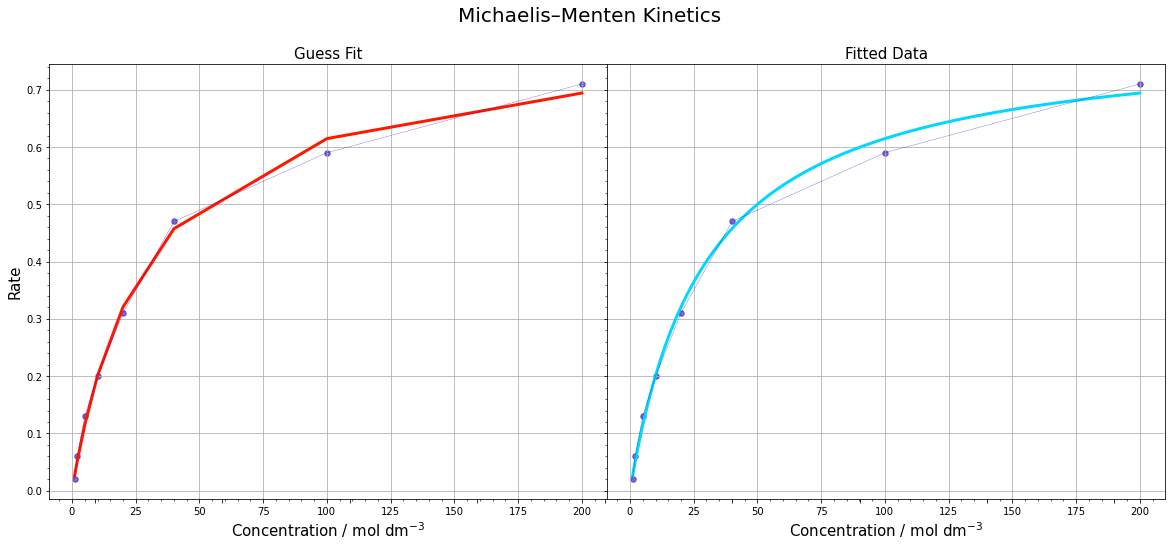

In [90]:
#Run this cell (Shift+Enter)
#import a useful fitting package
from scipy.optimize import curve_fit

#Label and isolate the raw data
conc = np.array([1.00,2.00,5.00,10.00, 20.00, 40.00, 100.00, 200.00])
rate = np.array([0.02,0.06,0.13,0.2,0.31,0.47,0.59,0.71])

#Michaelis-Menten Kinetics equation inputted as a function
def rate_opt(c, km, vmax):
    return (c*vmax)/(km+c)

#make guesses for constants
g = [30,0.9]
n = len(conc)
y = np.empty(n)
for i in range(n):
    y[i] = rate_opt(conc[i], g[0], g[1])
    
#Run function through curve_fit operation (non-linear regression)
k,cov = curve_fit(rate_opt,conc,rate, g)
print("Fitted Constants:-","\nKM:", k[0], "\nVmax:", k[1])
#use calculated constants for an improved fit
y = np.empty(n)
for i in range(n):
    y[i] = rate_opt(conc[i], k[0], k[1])
    
#Michaelis-Menten Kinetics equation inputted as a function    
def rate_smooth(s,km,vmax):
    return (s*vmax)/(km+s)

#create a new array using a larger number of inputs and the optimised constants for a smooth line output
base = np.linspace(1, 200, 400)
fitted = np.empty(400)
fitted_len = len(fitted)
for i in range(p_len):
    fitted[i] = rate_smooth(base[i],k[0],k[1])

#plot the figure   
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(20,8),sharey=True,gridspec_kw={'wspace': 0})
fig.suptitle('Michaelis–Menten Kinetics',fontsize=20)

#Create the gridlines
ax3 = fig.add_subplot(111, zorder=-1)
for _, spine in ax3.spines.items():
    spine.set_visible(False)
ax3.tick_params(labelleft=False, labelbottom=False, left=False, right=False )
ax3.get_shared_x_axes().join(ax3,ax1)
ax3.grid(axis="x")
ax1.grid()
ax2.grid()

#Plot Raw Data
ax1.set_title('Guess Fit',fontsize=15)
ax1.plot(conc,y,c='#FF1800',lw=3)
ax1.plot(conc,rate,lw=0.25,c='#2909B9',label='"Raw Data"')
ax1.scatter(conc,rate,s=30,c='#2909B9',alpha=0.6,label='Raw Data')
ax1.set_xlabel('Concentration / mol dm$^{-3}$',fontsize=15)
ax1.set_ylabel('Rate',fontsize=15)
ax1.minorticks_on()

#Plot Fitted Data
ax2.plot(base,fitted,lw=3,c='#02D7FF',label='"Test"')
ax2.plot(conc,rate,lw=0.25,c='#2909B9',label='"Raw Data"')
ax2.scatter(conc,rate,s=30,c='#2909B9',alpha=0.6,label='Raw Data')
ax2.set_title('Fitted Data',fontsize=15)
ax2.set_xlabel('Concentration / mol dm$^{-3}$',fontsize=15)
ax2.minorticks_on()

In [91]:
#Run this to see the R squared value for the fitted data
print("R squared: ", r2_score(rate,y))

R squared:  0.9967217459700304


**Left:** A graph showing the raw data in violet and a line of best fit (red) produced using estimated values of the constants $K_{M}$ and $V_{max}$.

**Right:** A graph showing the raw data in violet and a line of best fit (turquoise) produced using optimised values of the constants $K_{M}$ and $V_{max}$, resolved using non-linear regression.

 ### **Task 2**

**Using the `max()` function determine the highest rate measured in the `rate` dataset and the highest predicted value in the `fitted` dataset. Use `round()` to give answers to an apporapriate number of decimal places.**

In [92]:
#Finding the max values, and rounding them to an apporopriate number of decimal places.
print("The maximum theoretical rate predicted is", round(max(fitted),2), "and the maximum rate measured was", round(max(rate),2))

The maximum theoretical rate predicted is 0.69 and the maximum rate measured was 0.71


**Below is a list containing the $K_{M}$ for a number of commonm enzymes. Use `sum()` and `len()` to find and print the average $K_{M}$, and also give the value of the lowest $K_{M}$ using `min()`.**

In [93]:
#List containing the Km's for ome common enzymes
enzyme_km = [5000, 6, 4000, 5000, 8000, 50, 50, 400, 1000, 60, 3, 0.4, 300]

#Finding average and printing along with minimum Km
km_avg = (sum(enzyme_km))/(len(enzyme_km))
print("Average Km:", km_avg,"\nLowest Km:", min(enzyme_km))

Average Km: 1836.1076923076923 
Lowest Km: 0.4
